In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 10]


In [39]:
QUERY = ('SELECT * FROM `bigquery-public-data.covid19_nyt.us_counties` WHERE state_name = `New York` ORDER BY date DESC,confirmed_cases DESC LIMIT 20')
#QUERY = ("SELECT * FROM `bigquery-public-data.covid19_nyt.us_counties` WHERE state_name = `Washington` and date = `2020-07-31` ORDER BY deaths DESC,confirmed_cases DESC LIMIT 20")
query_job = client.query(QUERY)    # Start Query API Request
query_result = query_job.result()  # Get Query Result
df = query_result.to_dataframe()   # Save the Query Resultto Dataframe
#x = df.groupby('county')['deaths'].mean().sort_values()
#x.plot(kind='bar')

BadRequest: 400 Unrecognized name: `New York` at [1:81]

(job ID: fe55aaea-3c8a-4ec5-8838-6b5e78458b0f)

                                                        -----Query Job SQL Follows-----                                                         

    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |
   1:SELECT * FROM `bigquery-public-data.covid19_nyt.us_counties` WHERE state_name = `New York` ORDER BY date DESC,confirmed_cases DESC LIMIT 20
    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |

In [43]:
import os
import pandas as pd
from google.cloud import bigquery
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/philipmassey/.tokens/google_my-compute-engine.json"
client = bigquery.Client()         # Start the BigQuery Client
# Input your Query Syntax here; You may try it first at https://console.cloud.google.com/bigquery
QUERY = (
    'SELECT * FROM `bigquery-public-data.covid19_nyt.us_counties` ' 
    'WHERE date = `2020-07-31` '
     'ORDER BY date DESC,confirmed_cases DESC '
    'LIMIT 200')
query_job = client.query(QUERY)    # Start Query API Request
query_result = query_job.result()  # Get Query Result
df = query_result.to_dataframe()   # Save the Query Resultto Dataframe
#df

BadRequest: 400 Unrecognized name: `2020-07-31` at [1:75]

(job ID: 8100e1a1-60f4-4879-8154-e17b44c18b4d)

                                                       -----Query Job SQL Follows-----                                                       

    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |
   1:SELECT * FROM `bigquery-public-data.covid19_nyt.us_counties` WHERE date = `2020-07-31` ORDER BY date DESC,confirmed_cases DESC LIMIT 200
    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |

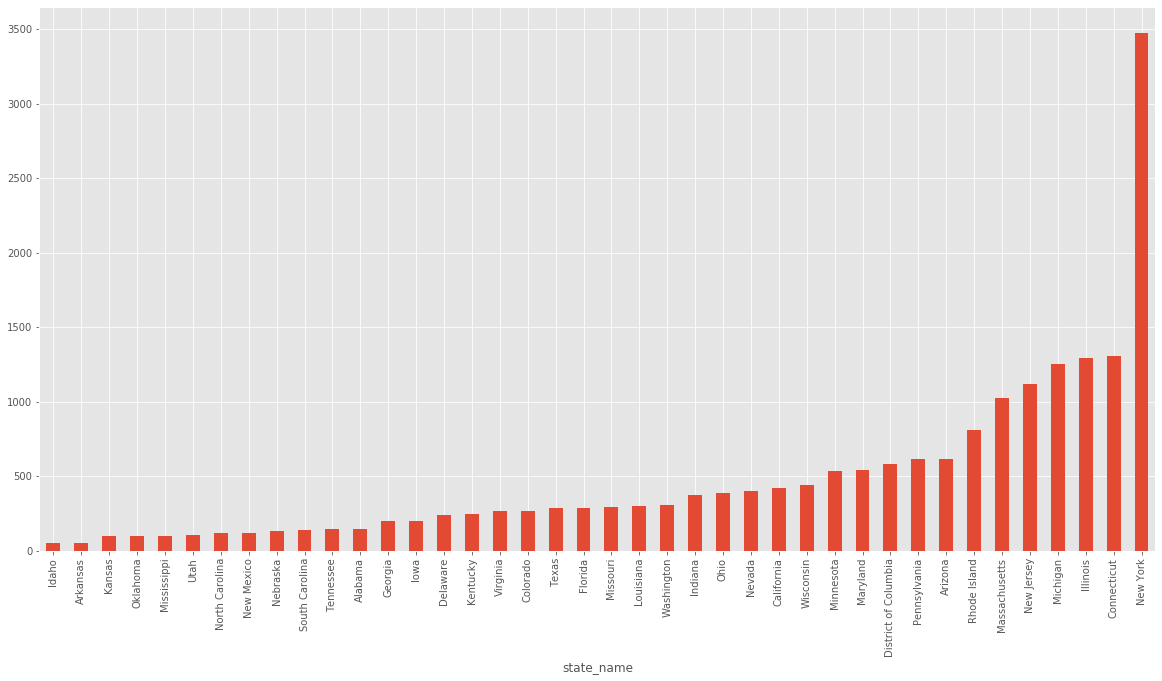

In [29]:
#x = df.groupby('state_name')['deaths'].mean().sort_values()
x = df.groupby('state_name')['deaths'].mean().sort_values()
x.plot(kind='bar')

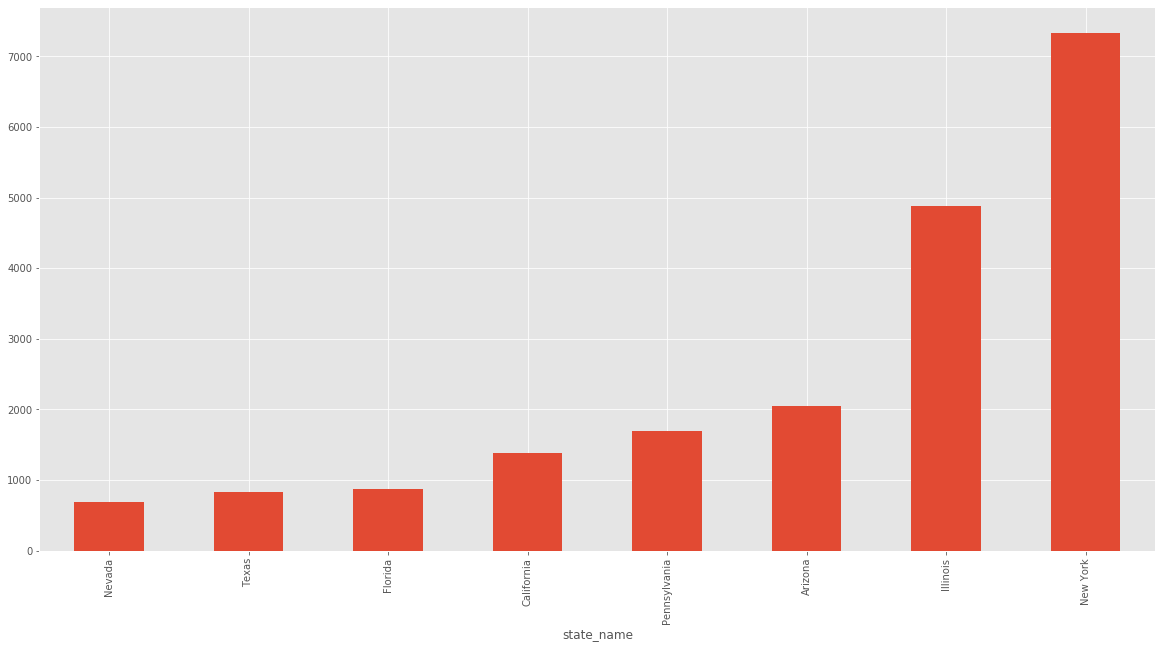

In [30]:
QUERY = (
    'SELECT * FROM `bigquery-public-data.covid19_nyt.us_counties` ' 
    'ORDER BY date DESC,confirmed_cases DESC '
    'LIMIT 20')
query_job = client.query(QUERY)    # Start Query API Request
query_result = query_job.result()  # Get Query Result
df = query_result.to_dataframe()   # Save the Query Resultto Dataframe
x = df.groupby('state_name')['deaths'].mean().sort_values()
x.plot(kind='bar')